<a href="https://colab.research.google.com/github/Bkevz/Data-Analytics/blob/main/CreditCard_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
fileName = "/content/gdrive/MyDrive/CreditCardFraudDetection/CreditCardFraudDetection/creditcard.csv"
dataset = read_csv(fileName)

In [7]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())

(284807, 31)
    Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1

In [8]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
nfcount=0

notFraud=dataset['Class']

for i in range(len(notFraud)):

  if notFraud[i]==0:

    nfcount=nfcount+1

nfcount

per_nf=(nfcount/len(notFraud))*100

print('percentage of total not fraud transaction in the dataset: ',per_nf)

percentage of total not fraud transaction in the dataset:  99.82725143693798


In [10]:
fcount=0

Fraud=dataset['Class']

for i in range(len(Fraud)):

  if Fraud[i]==1:

    fcount=fcount+1

fcount

per_f=(fcount/len(Fraud))*100

print('percentage of total fraud transaction in the dataset: ',per_f)

percentage of total fraud transaction in the dataset:  0.1727485630620034


Text(0.5, 1.0, 'Time Vs amount')

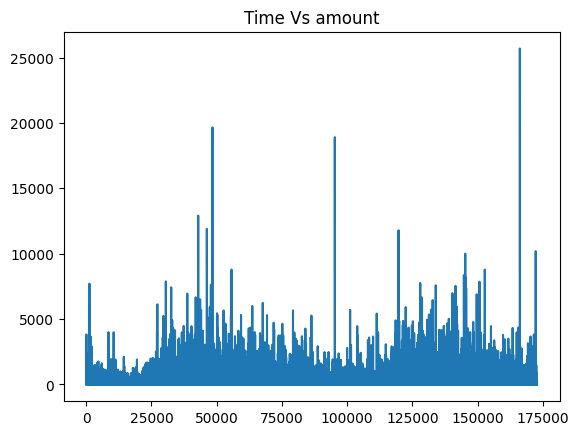

In [11]:
x=dataset['Time']

y=dataset['Amount']

plt.plot(x, y)

plt.title('Time Vs amount')

<ipython-input-13-13d8f562ac4c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Amount'],color='red');


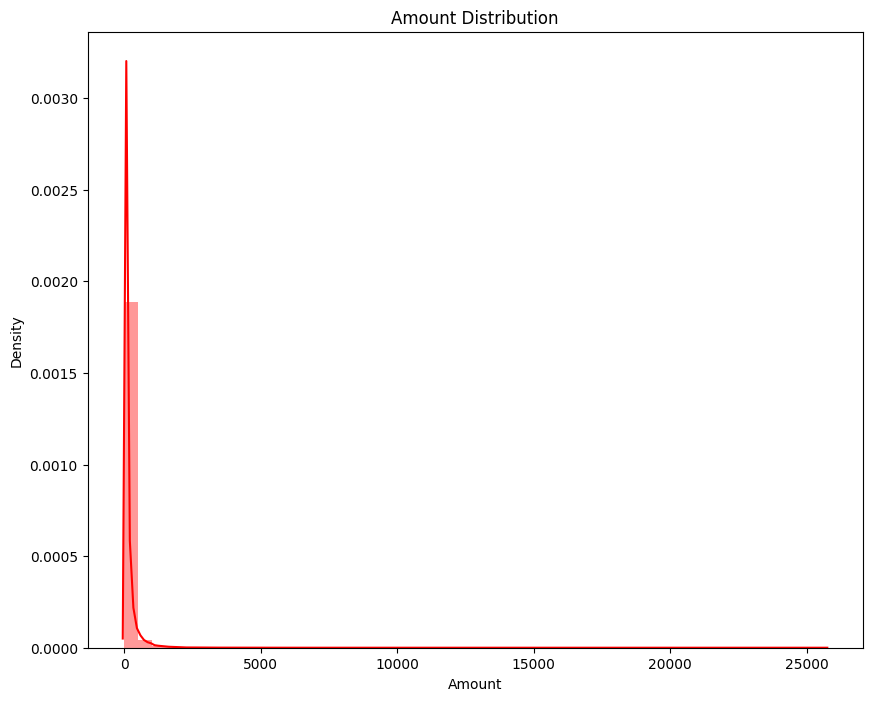

In [13]:
plt.figure(figsize=(10,8), )

plt.title('Amount Distribution')

sns.distplot(dataset['Amount'],color='red');

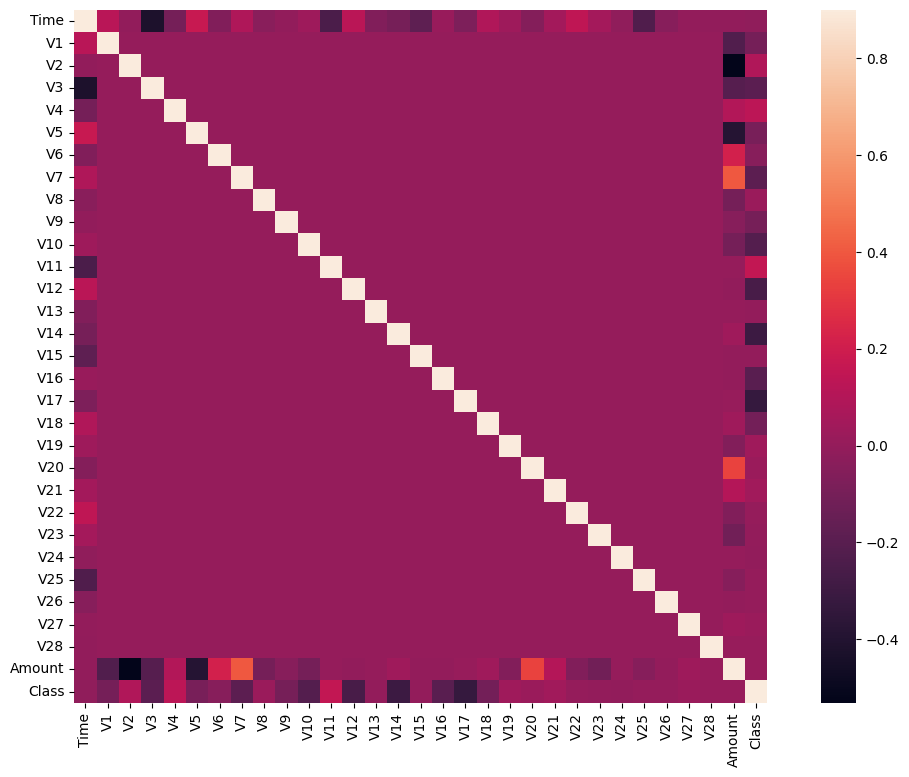

In [14]:
correlation_metrics = dataset.corr()

fig = plt.figure(figsize = (14, 9))

sns.heatmap(correlation_metrics, vmax = .9, square = True)

plt.show()

In [15]:
x=dataset.drop(['Class'], axis = 1)#drop the target variable

y=dataset['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression

linear =LinearRegression()

linear.fit(xtrain, ytrain)

LinearRegression()

In [17]:
y_pred = linear.predict(xtest)

table= pd.DataFrame({"Actual":ytest,"Predicted":y_pred})

table

,Actual,Predicted
43428,1,1.218185
49906,0,-0.000578
29474,0,-0.000726
276481,0,0.002957
278846,0,-0.001548
...,...,...
75723,0,-0.004392
252263,0,-0.000725
221246,0,0.001325
81910,0,0.001081
